# Supervised Learning - Regularization

In this exercise we're going to look at lowering the chance of overfitting by using regularization parameters. We will look at how the different chosen norms can affect the learned weight coefficients as well as what $\alpha$ parameters to choose to weight the regularization versus the fit function.

## Lasso & Ridge Regression

Let's start with both Lasso and Ridge regression. Each of these select a specific norm and weight it with respect to the fit function. This section should help you see the difference in selecting $\ell_1$ vs $\ell_2$ norm regularizers as well as how much to weight them.

You will define a function that can take any model and data and then:
1. Instantiate the model with the appropriate parameters
1. Train a model
1. Provide the learned parameters (coefficients) of that particular model

From there, we will chart each of Ridge and Lasso to look at how the different norms and $\alpha$ values affect the resulting model.

Try to interpret the charts and raise your hand if you want to verify your understanding.

In [86]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [4]:
# We'll generate some data to fit - this dataset is called the Hilbert matrix
# For this dataset, with all the models we create, **make sure you set fit_intercept to False**
# Can you figure out why?
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

Let's take a look at the data.

In [5]:
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [6]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
# Create some alpha values that we'll use to train several models
n_alphas = 200
alphas = np.logspace(-10, -1, n_alphas)

Some potentially useful Python review:

If you need to store many values in a list that require a complex process to calculate you can do the following:

```python
my_list = []
for i in some_iterable:
    # Do stuff to calculate a result
    my_list.append(result)
return my_list
```

If you instead want to store things in a dictionary, you can do:
```python
my_dictionary = {}
for i in some_iterable:
    # Do stuff to calculate a result
    my_dictionary[some_key] = result
return my_dictionary
```

In [95]:
def determine_coefficients(alphas, model, X, y):
    """Determine the coefficients of a linear model (Lasso or Ridge) given the various alphas. 
    You should train a model for each value of alpha and store its coefficients to be returned.
    
    Args:
        alphas (iterable): The alphas to test out with the model
        model (sklearn.estimator Class): A type of linear model not instantiated
        X (iterable): The data to train on
        y (iterable): The labels to train on
        
    Returns:
        coefs (iterable): the coefficients extracted from the trained model. See model.coef_
    """
    coefs = []
    if model is Ridge:
        for iAlpha in alphas:
            thisFit = Ridge(alpha = iAlpha, fit_intercept=False)
            thisFit.fit(X,y)
            coefs.append(thisFit.coef_)            
    if model is Lasso:
        for iAlpha in alphas:
            thisFit = Lasso(alpha = iAlpha, fit_intercept=False)
            thisFit.fit(X,y)
            coefs.append(thisFit.coef_ )  
    return coefs


In [90]:
coefs = determine_coefficients(alphas, Ridge, X, y)

prior to if statement


In [91]:
print(coefs)

[array([   2.64506206,  -27.60371263,    7.99291457,  133.67540194,
         18.0433204 , -123.85505126, -175.62010955, -113.78632714,
         45.15379311,  274.02304523]), array([   2.79059369,  -30.42452524,   19.10346698,  124.42853805,
          9.83348406, -122.7461262 , -167.80351647, -105.72767871,
         46.88727618,  264.15927755]), array([   2.9254783 ,  -33.04678276,   29.45424433,  115.79163207,
          2.18055896, -121.69744877, -160.49929602,  -98.20570137,
         48.49850033,  254.94212535]), array([   3.04994305,  -35.47529906,   39.06529097,  107.7472291 ,
         -4.93101529, -120.70673396, -153.69194813,  -91.20431436,
         49.99090747,  246.35145323]), array([   3.16426936,  -37.71597519,   47.96103652,  100.27412827,
        -11.52012631, -119.77106002, -147.36280118,  -84.70425067,
         51.36853355,  238.36318624]), array([   3.26877789,  -39.7755214 ,   56.16925415,   93.34811114,
        -17.60798188, -118.88708818, -141.49069396,  -78.68387053,


In [92]:
assert coefs
assert coefs[0].shape == (10,)
assert len(coefs) == len(alphas)


In this next chart, we plot the values of the learned coefficients for Ridge Regression. Each line presents a feature coefficient and how its value changes as $\alpha$ changes. What can you say about what happens when $\alpha$ is small? What about when it is large?

Note: recall which $\ell$ norm Ridge uses and what that means.

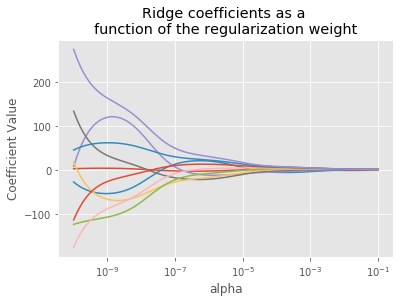

In [93]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge coefficients as a \nfunction of the regularization weight')
plt.axis('tight')
plt.show()

In [96]:
# Set the coefficients of lasso with the same data and alphas as ridge to lassoCoefs
# YOUR CODE HERE
lassoCoefs = determine_coefficients(alphas, Lasso, X, y)

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

In [97]:
assert lassoCoefs
assert lassoCoefs[0].shape == (10,)
assert len(lassoCoefs) == len(alphas)
assert not np.all([lassoCoefs,coefs])

In this next chart, we plot the values of the learned coefficients for Lasso. Each line presents a feature coefficient and how its value changes as $\alpha$ changes. What can you say about what happens when $\alpha$ is small? What about when it is large?

Note: recall which $\ell$ norm Lasso uses and what that means.

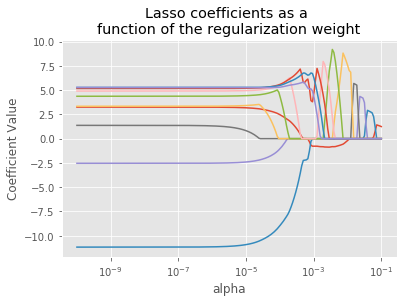

In [98]:
ax = plt.gca()

ax.plot(alphas, lassoCoefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso coefficients as a \nfunction of the regularization weight')
plt.axis('tight')
plt.show()

Note that with lasso, the coefficients are significantly smaller.

## Elastic Net

Elastic net combines the two regularizations in Lasso and Ridge. In this case, we investigate how the model changes the learned coefficient for the combined regularization.

In [99]:
l1_ratios = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]


In [100]:
elastic_coefs = {}
for l1_ratio in l1_ratios:
    elastic_coefs[l1_ratio] = []
    for alpha in alphas:
        # Create an Elastic net model with the alpha and l1_ratio provided
        # Save that model to the variable model
        # Add the model's coefficients to elastic_coefs at the l1_ratio key's list
        thisFit = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, fit_intercept = False)
        thisFit.fit(X,y)
        elastic_coefs[l1_ratio].append(thisFit.coef_)
        
return elastic_coefs


/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/lewisblake/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: 

SyntaxError: 'return' outside function (<ipython-input-100-35607ad64ddb>, line 12)

In [101]:
assert set(elastic_coefs.keys()) == set(l1_ratios)
for l1_ratio in l1_ratios:
    assert len(elastic_coefs[l1_ratio]) == len(alphas)
    for i,_ in enumerate(alphas):
        assert len(elastic_coefs[l1_ratio][i]) == 10

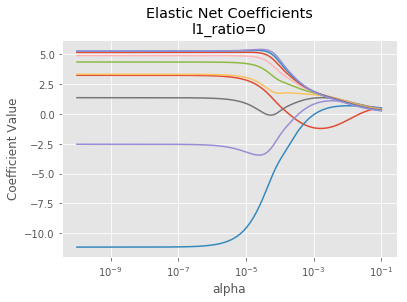

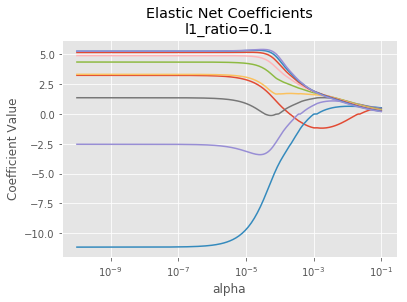

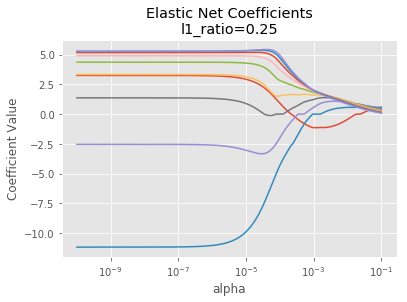

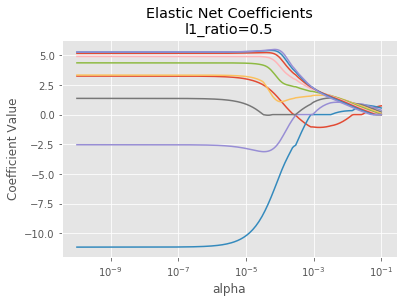

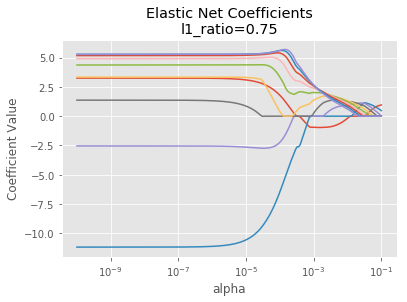

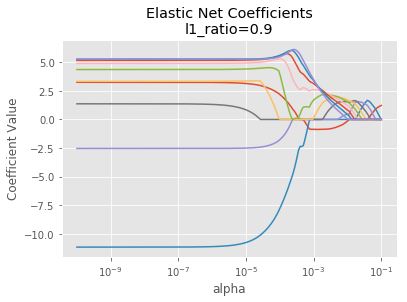

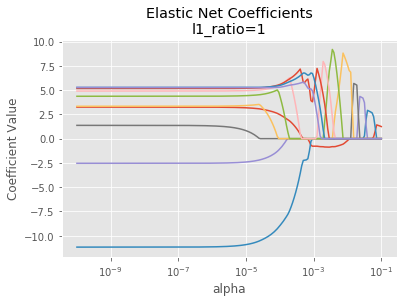

In [102]:
for l1_ratio in l1_ratios:
    ax = plt.gca()

    ax.plot(alphas, elastic_coefs[l1_ratio])
    ax.set_xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('Coefficient Value')
    plt.title(f'Elastic Net Coefficients\nl1_ratio={l1_ratio}')
    plt.axis('tight')
    plt.show()

Can you interpret how the $\ell_1$ ratio affects the model?

## Feedback

In [103]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "Good exercise. Some warning about what to look for before going into the exercise would be helpful."